In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customerData = pd.read_csv('/content/QVI_purchase_behaviour.csv')


In [ ]:
transactionData = pd.read_csv('/content/QVI_transaction_data.csv')

In [ ]:
customerData.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
transactionData.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [ ]:
transactionData['DATE'] = pd.to_datetime(transactionData['DATE'], origin="1899-12-30", unit = 'D')

In [ ]:
transactionData['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

In [ ]:
transactionData['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

Converting the PROD_NAME column to column with just the name of the product.

In [ ]:
Prod_Name_Only = transactionData['PROD_NAME'].str.replace('[0-9]', ' ').str.replace('[gG]', ' ').str.replace('[^\w]', ' ').str.split()

<ipython-input-12-0ebc3398f8fe>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Prod_Name_Only = transactionData['PROD_NAME'].str.replace('[0-9]', ' ').str.replace('[gG]', ' ').str.replace('[^\w]', ' ').str.split()


In [ ]:
Prod_Name_Only.head()

0             [Natural, Chip, Compny, SeaSalt]
1                         [CCs, Nacho, Cheese]
2       [Smiths, Crinkle, Cut, Chips, Chicken]
3      [Smiths, Chip, Thinly, S, Cream, Onion]
4    [Kettle, Tortilla, ChpsHny, Jlpno, Chili]
Name: PROD_NAME, dtype: object

In [ ]:
Prod_Total = pd.value_counts([word for name in Prod_Name_Only
                             for word in name])

In [ ]:
Prod_Total.head()

Chips     49770
Kettle    41288
Smiths    28860
Salt      27976
Cheese    27890
dtype: int64

In [ ]:
Prod_Total = Prod_Total.sort_values(ascending = False)

It looks like the products also include the Salsa products but as we are only looking for at the Chips data we will remove the Salsa Products.

In [ ]:
print(Prod_Total['Salsa'])

18094


In [ ]:
SalsaRows = transactionData['PROD_NAME'].str.contains('[Ss]alsa')

In [ ]:
SalsaRows.head(10)

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9    False
Name: PROD_NAME, dtype: bool

In [ ]:
transactionData = transactionData[~SalsaRows]

In [ ]:
transactionData.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7


Now the data only has the information about chips.

In [ ]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


In [ ]:
transactionData.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [ ]:
transactionData.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

There is no null values in any rows.
But the PROD_QTY and TOT_SALES is showing an outlier.

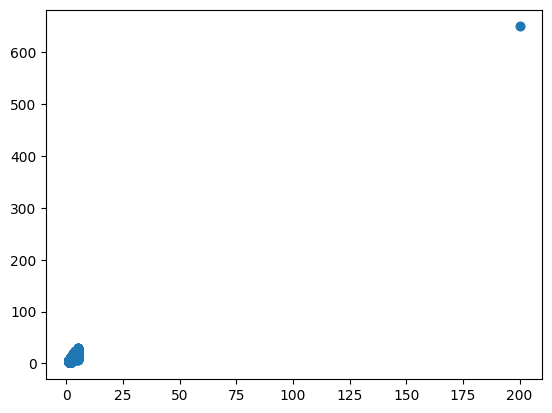

In [ ]:
plt.scatter(transactionData['PROD_QTY'], transactionData['TOT_SALES'])

There is definitely an outlier in PROD_QTY so let's look in it further.

In [ ]:
transactionData.loc[transactionData['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There are 2 transaction by same customer so we are going to remove it.

In [ ]:
PROD_QTY_OUT = transactionData.loc[transactionData['PROD_QTY'] == 200 ]
PROD_QTY_OUT.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [ ]:
transactionData =transactionData.drop(index =[69762, 69763])

In [ ]:
transactionData.loc[transactionData['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


*Now that looks better.*

In [ ]:
transaction_date = transactionData.groupby(['DATE']).count()

In [ ]:
transaction_date.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,677.857143,677.857143,677.857143,677.857143,677.857143,677.857143,677.857143
std,33.687536,33.687536,33.687536,33.687536,33.687536,33.687536,33.687536
min,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
25%,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
50%,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
75%,694.250000,694.250000,694.250000,694.250000,694.250000,694.250000,694.250000
max,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000


The data is for a whole year but total rows are 364 that means there is a missing value. So let's look for it.

In [ ]:
transactionData.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7


First we will the find the missing date then add it to our data.

In [ ]:
date_pattern = pd.date_range(start = '2018-07-01', end = '2019-06-30')
print(date_pattern)

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10',
               ...
               '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24',
               '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
               '2019-06-29', '2019-06-30'],
              dtype='datetime64[ns]', length=365, freq='D')


In [ ]:
new_dates = transaction_date.reindex(date_pattern)

In [ ]:
new_dates

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
2018-07-01,663.0,663.0,663.0,663.0,663.0,663.0,663.0
2018-07-02,650.0,650.0,650.0,650.0,650.0,650.0,650.0
2018-07-03,674.0,674.0,674.0,674.0,674.0,674.0,674.0
2018-07-04,669.0,669.0,669.0,669.0,669.0,669.0,669.0
2018-07-05,660.0,660.0,660.0,660.0,660.0,660.0,660.0
...,...,...,...,...,...,...,...
2019-06-26,657.0,657.0,657.0,657.0,657.0,657.0,657.0
2019-06-27,669.0,669.0,669.0,669.0,669.0,669.0,669.0
2019-06-28,673.0,673.0,673.0,673.0,673.0,673.0,673.0
2019-06-29,703.0,703.0,703.0,703.0,703.0,703.0,703.0


In [ ]:
new_dates.index.difference(transactionData['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [ ]:
new_dates.loc['2018-12-25', :]

STORE_NBR        NaN
LYLTY_CARD_NBR   NaN
TXN_ID           NaN
PROD_NBR         NaN
PROD_NAME        NaN
PROD_QTY         NaN
TOT_SALES        NaN
Name: 2018-12-25 00:00:00, dtype: float64

As the difference is in december so we will look only at december dates.

Text(0, 0.5, 'Number of Transactions')

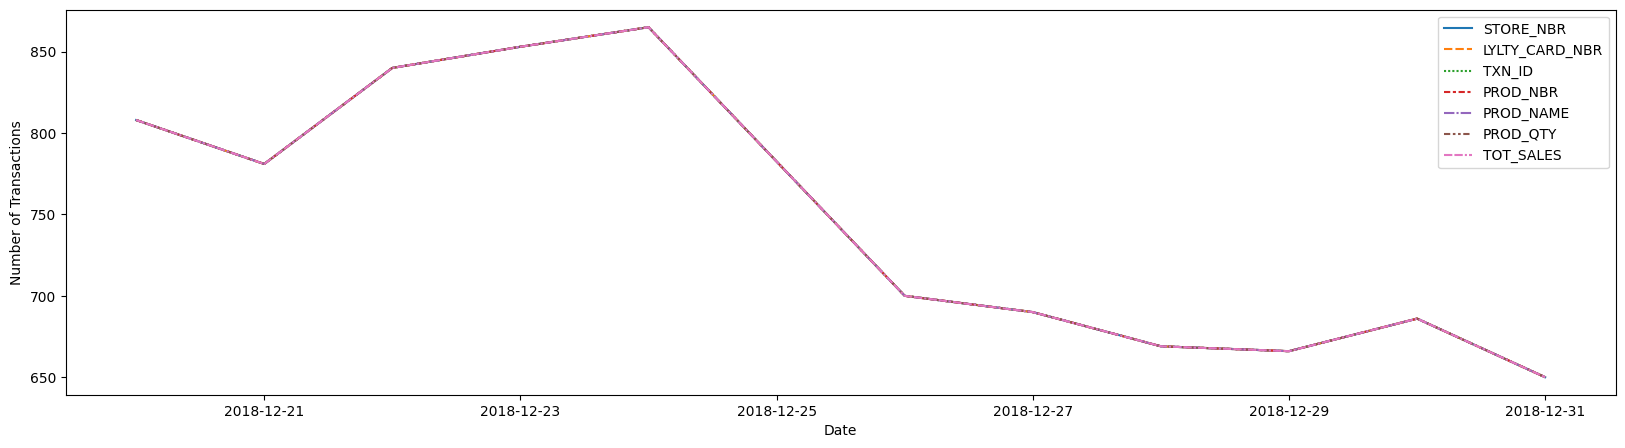

In [ ]:
fig = plt.subplots(figsize=(20,5))
sns.lineplot(data= new_dates.loc['2018-12-20':'2018-12-31', :])
plt.xlabel("Date")
plt.ylabel("Number of Transactions")

The reason for this missing is that it is Christmas holiday so it is not treated as outlier.

Now looking at pack sizes

In [ ]:
pack_size = transactionData['PROD_NAME'].str.extract('([0-9]+)').astype('float')

In [ ]:
pack_size.head()

,0
0,175.0
1,175.0
2,170.0
3,175.0
4,150.0


In [ ]:
pack_size.describe()

,0
count,246740.000000
mean,175.583521
std,59.432118
min,70.000000
25%,150.000000
50%,170.000000
75%,175.000000
max,380.000000


In [ ]:
transactionData['pack_size'] = pack_size

Looks Sensible

Text(0, 0.5, 'Number of Transactions')

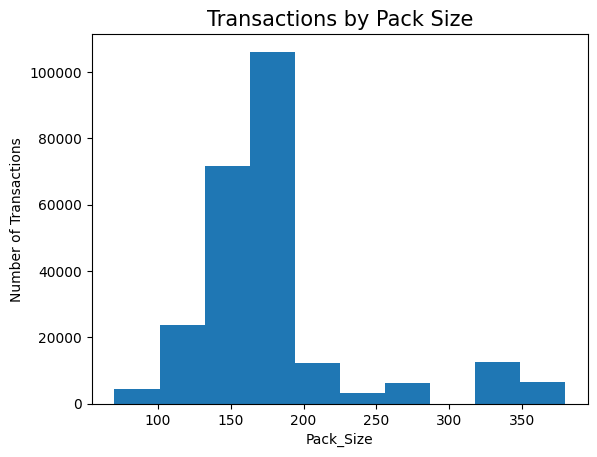

In [ ]:
plt.hist(x= transactionData['pack_size'],bins = 10)
plt.title("Transactions by Pack Size",fontsize=15)
plt.xlabel("Pack_Size",fontsize=10)
plt.ylabel("Number of Transactions",fontsize=10)

In [ ]:
transactionData["brand_name"] = transactionData["PROD_NAME"].str.split().str[0]

In [ ]:
transactionData['brand_name']

0          Natural
1              CCs
2           Smiths
3           Smiths
4           Kettle
            ...   
264831      Kettle
264832    Tostitos
264833     Doritos
264834     Doritos
264835    Tostitos
Name: brand_name, Length: 246740, dtype: object

In [ ]:
transactionData['brand_name'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

If we look at it more closely, we see that some brand names are same and are written differently. If we don't change it products of same company will be divided into parts and analysis regarding the brands will be wrong. So we will change the names of them.

In [ ]:
brand_new = transactionData['brand_name'].replace({"Dorito":'Doritos', 'Red':'Red Rock Deli', 'RRD': 'Red Rock Deli','Grain': 'Grain Waves', 'GrnWves':'Grain Waves', 'Infzns':'Infuzions', 'NCC':'Natural Chips CO', 'Natural': 'Natural Chips CO', 'Smith':'Smiths', 'Snbts':'Sunbites', 'WW':'Woolworths'})

In [ ]:
brand_new.unique()

array(['Natural Chips CO', 'CCs', 'Smiths', 'Kettle', 'Grain Waves',
       'Doritos', 'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [ ]:
transactionData['brand_new'] = brand_new
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size,brand_name,brand_new
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,Natural Chips CO
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,Kettle


Text(0, 0.5, 'Brand Name')

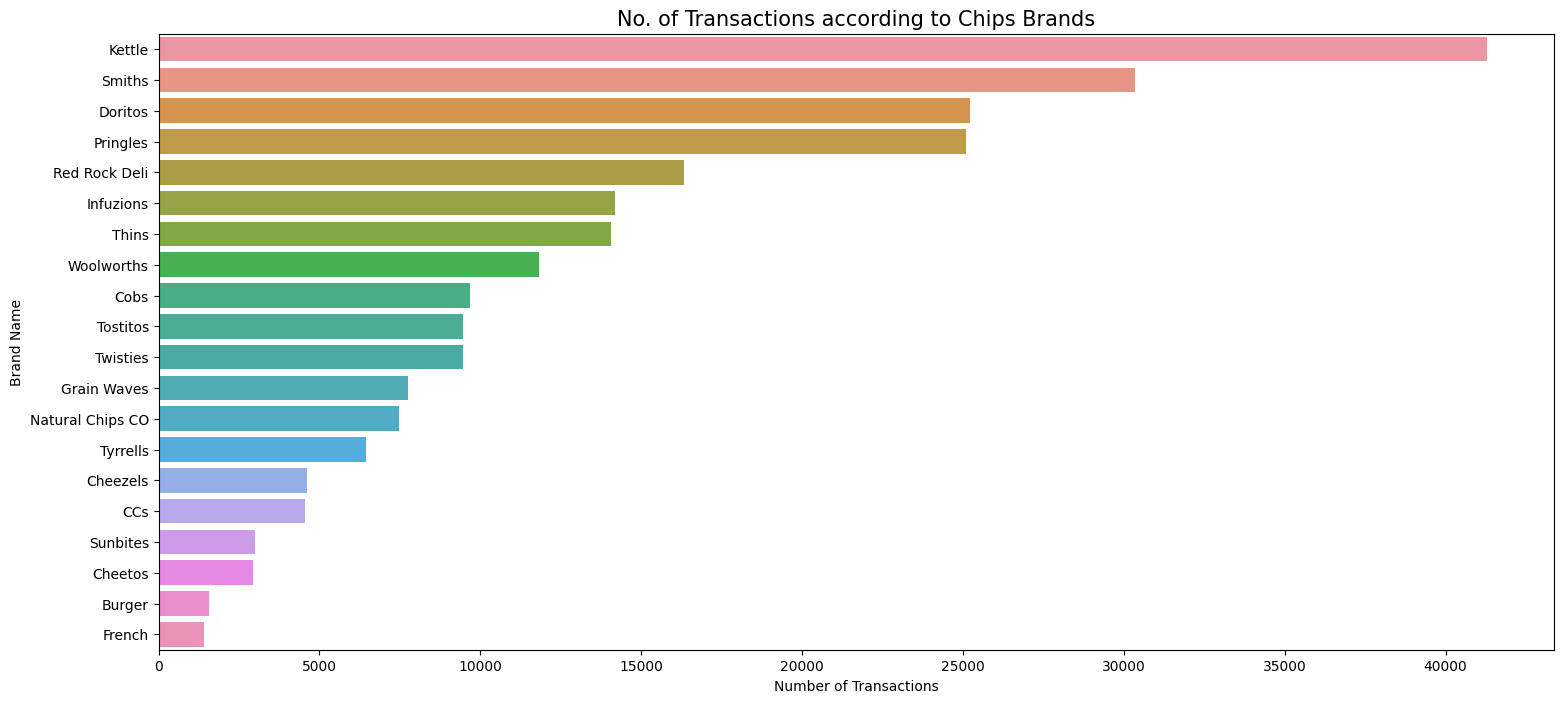

In [ ]:
fig3 = plt.figure(figsize=(18,8))
sns.barplot(x = transactionData['brand_new'].value_counts(), y=transactionData["brand_new"].value_counts().index,)
plt.title('No. of Transactions according to Chips Brands', fontsize =15)
plt.xlabel("Number of Transactions")
plt.ylabel("Brand Name")

### *Now let's explore the customer data*

In [ ]:
customerData.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
customerData.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


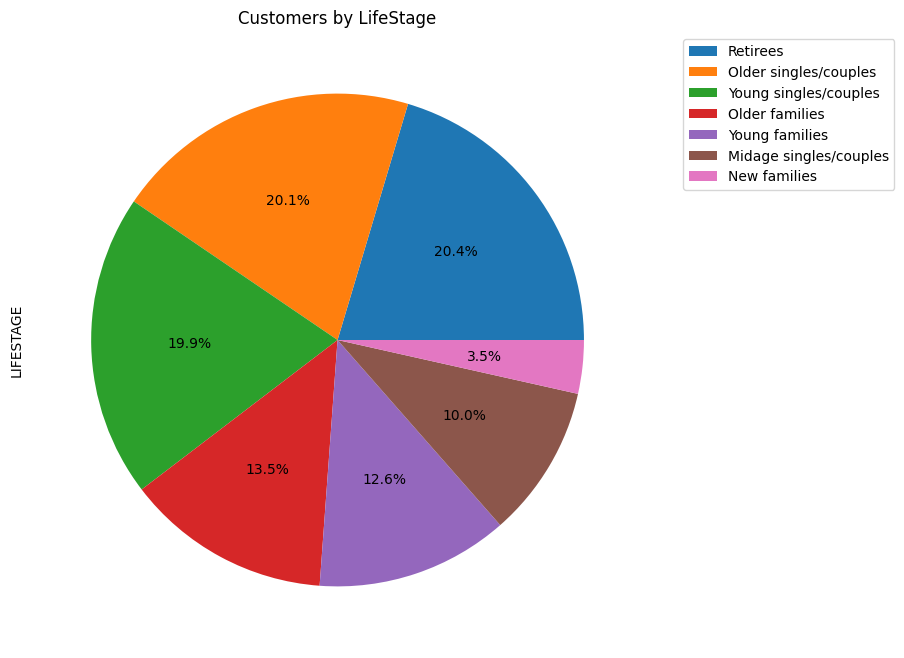

In [ ]:
plt.figure(figsize=(15,8))
customerData['LIFESTAGE'].value_counts().plot(kind='pie',labels = None, autopct='%.1f%%')
plt.legend(customerData['LIFESTAGE'].value_counts().index.str.capitalize(), loc = 'best', bbox_to_anchor = (1.05,1))
plt.title('Customers by LifeStage')
plt.show()

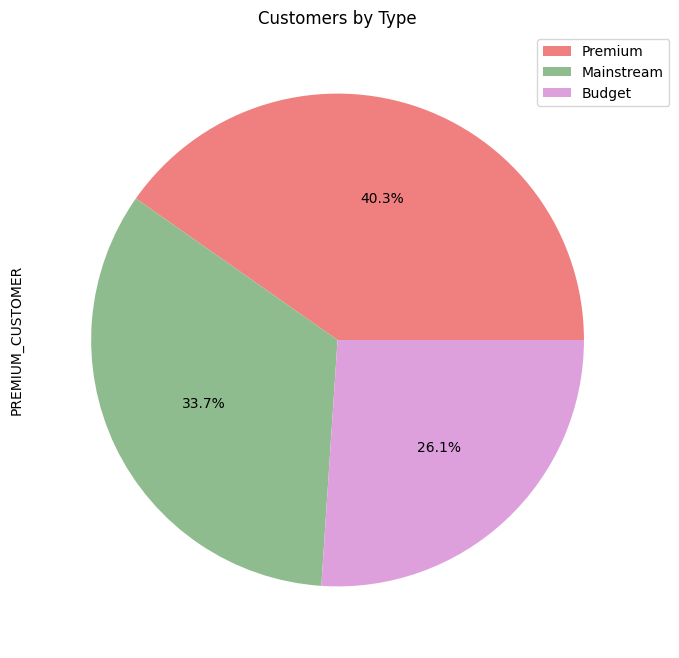

In [ ]:
plt.figure(figsize=(15,8))
customerData['PREMIUM_CUSTOMER'].value_counts().plot(kind='pie',colors = ['lightcoral', 'darkseagreen', 'plum'], labels = None, autopct='%.1f%%')
plt.legend(customerData['PREMIUM_CUSTOMER'], loc = 'best', bbox_to_anchor = (1.05,1))
plt.title('Customers by Type')
plt.show()

Merging the two datasets for further analysis

In [ ]:
data_merged = pd.merge(customerData, transactionData, how = 'outer', on = 'LYLTY_CARD_NBR')
data_merged.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size,brand_name,brand_new
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,175.0,Natural,Natural Chips CO
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1.0,2.0,58.0,Red Rock Deli Chikn&Garlic Aioli 150g,1.0,2.7,150.0,Red,Red Rock Deli
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1.0,3.0,52.0,Grain Waves Sour Cream&Chives 210G,1.0,3.6,210.0,Grain,Grain Waves
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1.0,4.0,106.0,Natural ChipCo Hony Soy Chckn175g,1.0,3.0,175.0,Natural,Natural Chips CO
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1.0,5.0,96.0,WW Original Stacked Chips 160g,1.0,1.9,160.0,WW,Woolworths


Saving our data as csv file

In [ ]:
data_merged = data_merged.to_csv('data_merged.csv')

In [ ]:
data_merged = pd.read_csv('/content/data_merged.csv')

In [ ]:
total_sales = data_merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()
total_sales

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget               33345.70
                        Mainstream           84734.25
                        Premium              54443.85
NEW FAMILIES            Budget               20607.45
                        Mainstream           15979.70
                        Premium              10760.80
OLDER FAMILIES          Budget              156863.75
                        Mainstream           96413.55
                        Premium              75242.60
OLDER SINGLES/COUPLES   Budget              127833.60
                        Mainstream          124648.50
                        Premium             123537.55
RETIREES                Budget              105916.30
                        Mainstream          145168.95
                        Premium              91296.65
YOUNG FAMILIES          Budget              129717.95
                        Mainstream           86338.25
                        Premium          

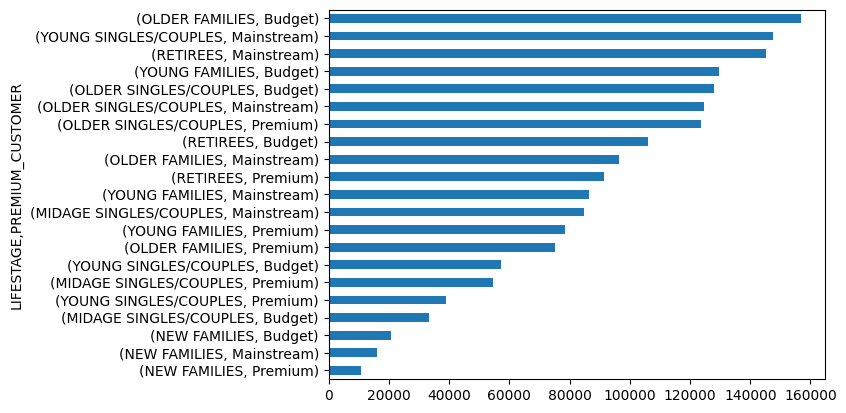

In [ ]:
total_sales.sort_values().plot(kind = 'barh')
plt.show()

In [ ]:
tot_customer = customerData.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).count()
tot_customer

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
MIDAGE SINGLES/COUPLES Budget                      1504
                       Mainstream                  3340
                       Premium                     2431
NEW FAMILIES           Budget                      1112
                       Mainstream                   849
                       Premium                      588
OLDER FAMILIES         Budget                      4675
                       Mainstream                  2831
                       Premium                     2274
OLDER SINGLES/COUPLES  Budget                      4929
                       Mainstream                  4930
                       Premium                     4750
RETIREES               Budget                      4454
                       Mainstream                  6479
                       Premium                     3872
YOUNG FAMILIES         Budget                      4017
                       Mainstream                  2728
                       Premium                     2433
YOUNG SINGLES/COUPLES  Budget                      3779
                       Mainstream                  8088
                       Premium                     2574

<Axes: ylabel='LIFESTAGE,PREMIUM_CUSTOMER'>

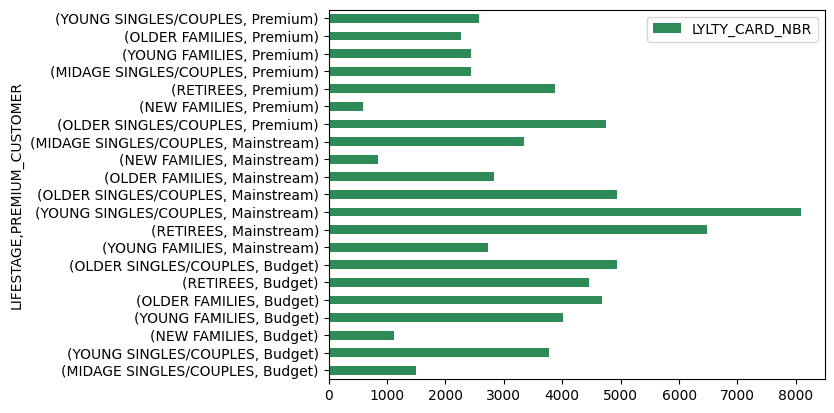

In [ ]:
tot_customer.sort_values(by = 'PREMIUM_CUSTOMER').plot(kind = 'barh', color = ['seagreen'])

In [ ]:
merge_lp = pd.concat([total_sales, tot_customer],axis=1)
merge_lp = pd.DataFrame(merge_lp)
merge_lp.rename(columns = {'LYLTY_CARD_NBR': 'CUSTOMER_CNT'}, inplace = True)
merge_lp['TOT_QTY'] = data_merged.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].sum()
merge_lp['AVG_QTY'] = merge_lp['TOT_QTY'] / merge_lp['CUSTOMER_CNT']
merge_lp['AVG_PR'] = merge_lp['TOT_SALES'] / merge_lp['TOT_QTY']
merge_lp

TOT_SALES  CUSTOMER_CNT  TOT_QTY  \
LIFESTAGE              PREMIUM_CUSTOMER                                     
MIDAGE SINGLES/COUPLES Budget             33345.70          1504   8883.0   
                       Mainstream         84734.25          3340  21213.0   
                       Premium            54443.85          2431  14400.0   
NEW FAMILIES           Budget             20607.45          1112   5241.0   
                       Mainstream         15979.70           849   4060.0   
                       Premium            10760.80           588   2769.0   
OLDER FAMILIES         Budget            156863.75          4675  41853.0   
                       Mainstream         96413.55          2831  25804.0   
                       Premium            75242.60          2274  20239.0   
OLDER SINGLES/COUPLES  Budget            127833.60          4929  32883.0   
                       Mainstream        124648.50          4930  32607.0   
                       Premium           123537.55          4750  31695.0   
RETIREES               Budget            105916.30          4454  26932.0   
                       Mainstream        145168.95          6479  37677.0   
                       Premium            91296.65          3872  23266.0   
YOUNG FAMILIES         Budget            129717.95          4017  34482.0   
                       Mainstream         86338.25          2728  23194.0   
                       Premium            78571.70          2433  20901.0   
YOUNG SINGLES/COUPLES  Budget             57122.10          3779  15500.0   
                       Mainstream        147582.20          8088  36225.0   
                       Premium            39052.30          2574  10575.0   

                                          AVG_QTY    AVG_PR  
LIFESTAGE              PREMIUM_CUSTOMER                      
MIDAGE SINGLES/COUPLES Budget            5.906250  3.753878  
                       Mainstream        6.351198  3.994449  
                       Premium           5.923488  3.780823  
NEW FAMILIES           Budget            4.713129  3.931969  
                       Mainstream        4.782097  3.935887  
                       Premium           4.709184  3.886168  
OLDER FAMILIES         Budget            8.952513  3.747969  
                       Mainstream        9.114800  3.736380  
                       Premium           8.900176  3.717703  
OLDER SINGLES/COUPLES  Budget            6.671333  3.887529  
                       Mainstream        6.613996  3.822753  
                       Premium           6.672632  3.897698  
RETIREES               Budget            6.046700  3.932731  
                       Mainstream        5.815249  3.852986  
                       Premium           6.008781  3.924037  
YOUNG FAMILIES         Budget            8.584018  3.761903  
                       Mainstream        8.502199  3.722439  
                       Premium           8.590629  3.759232  
YOUNG SINGLES/COUPLES  Budget            4.101614  3.685297  
                       Mainstream        4.478858  4.074043  
                       Premium           4.108392  3.692889

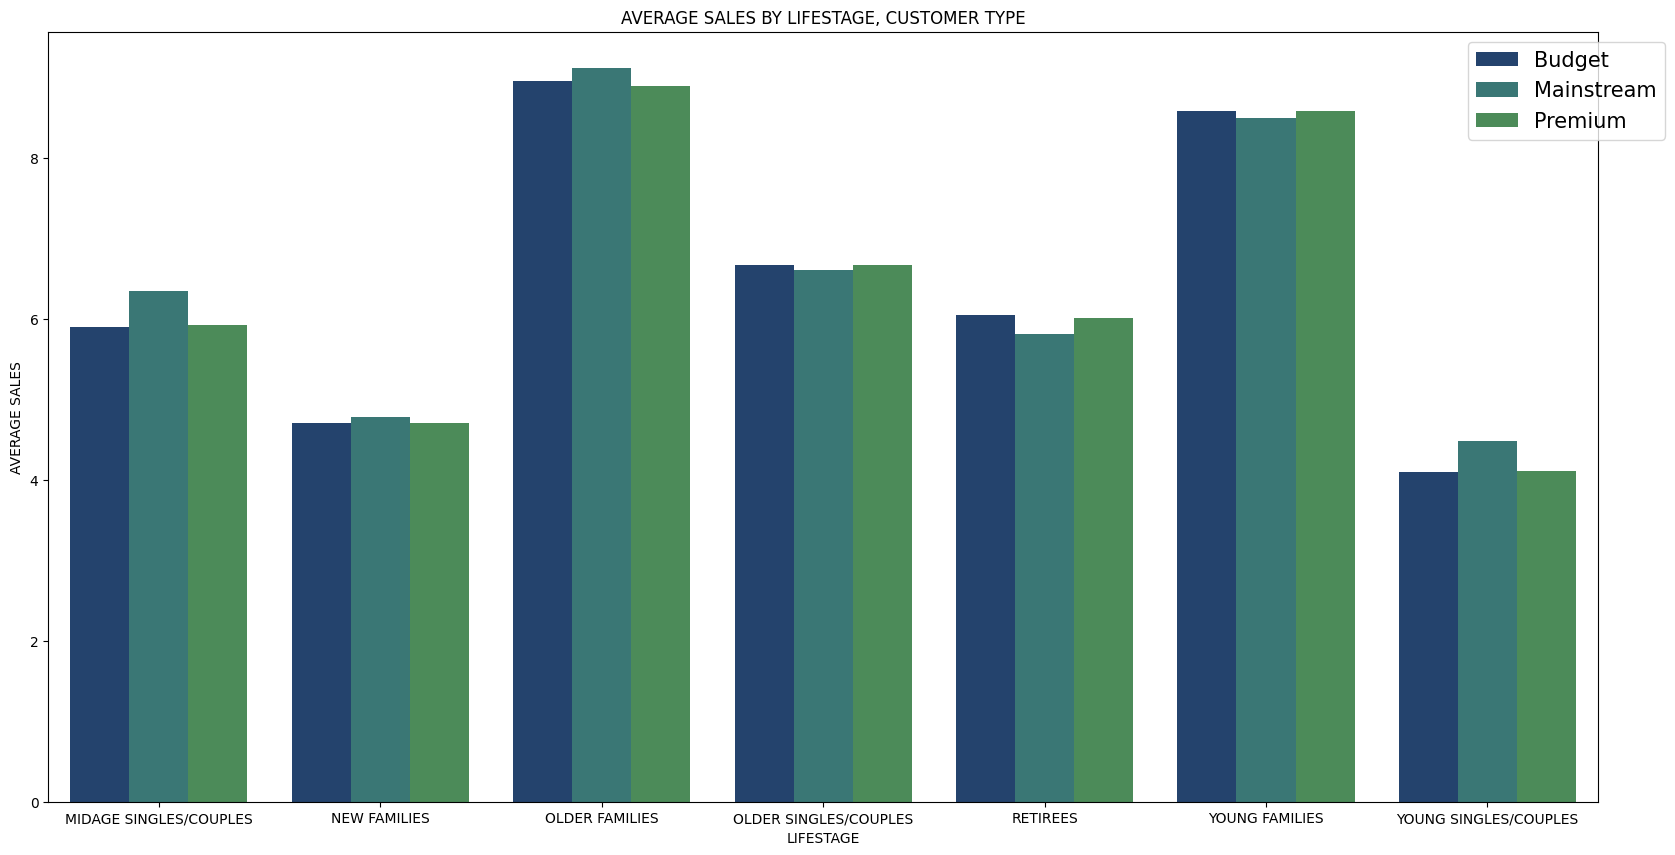

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=merge_lp.reset_index()['LIFESTAGE'], y=merge_lp.reset_index()['AVG_QTY'], hue=merge_lp.reset_index()['PREMIUM_CUSTOMER'].map(str), palette=sns.color_palette('gist_earth'))
plt.xlabel('LIFESTAGE')
plt.ylabel('AVERAGE SALES')
plt.title('AVERAGE SALES BY LIFESTAGE, CUSTOMER TYPE')
plt.legend( loc='best', bbox_to_anchor=(1.05, 1), fontsize =15)
plt.show()

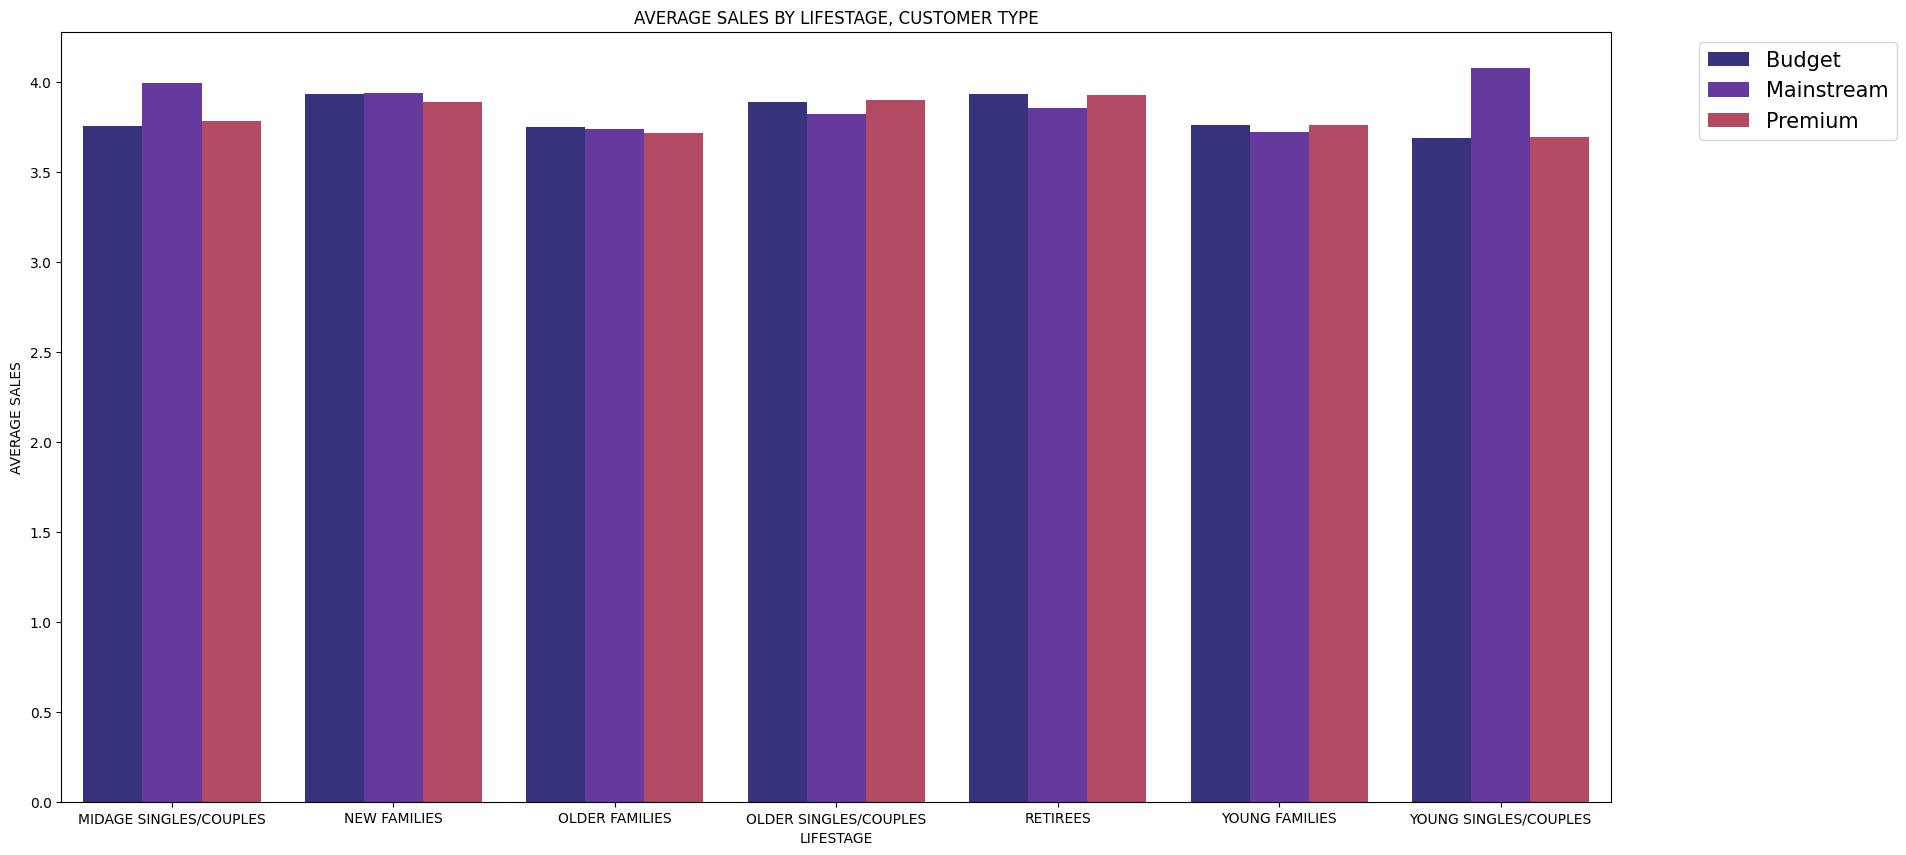

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=merge_lp.reset_index()['LIFESTAGE'], y=merge_lp.reset_index()['AVG_PR'], hue=merge_lp.reset_index()['PREMIUM_CUSTOMER'].map(str), palette= sns.color_palette('CMRmap')            )
plt.xlabel('LIFESTAGE')
plt.ylabel('AVERAGE SALES')
plt.title('AVERAGE SALES BY LIFESTAGE, CUSTOMER TYPE')
plt.legend( loc='best', bbox_to_anchor=(1.05, 1), fontsize =15)
plt.show()

In [ ]:
from scipy import stats

In [ ]:
merge_lp.shape

(21, 5)

In [ ]:
merge_lp = merge_lp.reset_index()

In [ ]:

MS = merge_lp.loc[merge_lp['PREMIUM_CUSTOMER'] =='Mainstream']
Pr_Bu = merge_lp.loc[(merge_lp['PREMIUM_CUSTOMER'] == 'Premium') | (merge_lp['PREMIUM_CUSTOMER'] =='Budget')]
MS
Pr_Bu

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,CUSTOMER_CNT,TOT_QTY,AVG_QTY,AVG_PR
0,MIDAGE SINGLES/COUPLES,Budget,33345.70,1504,8883.0,5.906250,3.753878
2,MIDAGE SINGLES/COUPLES,Premium,54443.85,2431,14400.0,5.923488,3.780823
3,NEW FAMILIES,Budget,20607.45,1112,5241.0,4.713129,3.931969
5,NEW FAMILIES,Premium,10760.80,588,2769.0,4.709184,3.886168
6,OLDER FAMILIES,Budget,156863.75,4675,41853.0,8.952513,3.747969
8,OLDER FAMILIES,Premium,75242.60,2274,20239.0,8.900176,3.717703
9,OLDER SINGLES/COUPLES,Budget,127833.60,4929,32883.0,6.671333,3.887529
11,OLDER SINGLES/COUPLES,Premium,123537.55,4750,31695.0,6.672632,3.897698
12,RETIREES,Budget,105916.30,4454,26932.0,6.046700,3.932731
14,RETIREES,Premium,91296.65,3872,23266.0,6.008781,3.924037


In [ ]:
MS_mid_y = MS["AVG_PR"][(merge_lp["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES")|(merge_lp["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")]
PB_mid_y = Pr_Bu["AVG_PR"][(merge_lp["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES")|(merge_lp["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")]


In [ ]:
MS_mid_y

1     3.994449
19    4.074043
Name: AVG_PR, dtype: float64

In [ ]:
stats.ttest_ind(MS_mid_y, PB_mid_y)

TtestResult(statistic=7.181830997406295, pvalue=0.0019909612272297904, df=4.0)

In [ ]:
MS_mysc = data_merged[(data_merged['PREMIUM_CUSTOMER'] == 'Mainstream') & (data_merged['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]
MS_mysc

,Unnamed: 0,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pack_size,brand_name,brand_new
1,1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1.0,2.0,58.0,Red Rock Deli Chikn&Garlic Aioli 150g,1.0,2.7,150.0,Red,Red Rock Deli
9,9,1010,YOUNG SINGLES/COUPLES,Mainstream,2018-09-09,1.0,10.0,51.0,Doritos Mexicana 170g,2.0,8.8,170.0,Doritos,Doritos
19,19,1018,YOUNG SINGLES/COUPLES,Mainstream,2018-09-03,1.0,22.0,3.0,Kettle Sensations Camembert & Fig 150g,1.0,4.6,150.0,Kettle,Kettle
20,20,1018,YOUNG SINGLES/COUPLES,Mainstream,2018-11-28,1.0,23.0,97.0,RRD Salt & Vinegar 165g,1.0,3.0,165.0,RRD,Red Rock Deli
21,21,1018,YOUNG SINGLES/COUPLES,Mainstream,2019-06-20,1.0,24.0,38.0,Infuzions Mango Chutny Papadums 70g,1.0,2.4,70.0,Infuzions,Infuzions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248042,248042,272391,YOUNG SINGLES/COUPLES,Mainstream,2018-12-07,272.0,270205.0,63.0,Kettle 135g Swt Pot Sea Salt,2.0,8.4,135.0,Kettle,Kettle
248062,248062,2330041,YOUNG SINGLES/COUPLES,Mainstream,2018-09-23,77.0,236718.0,24.0,Grain Waves Sweet Chilli 210g,2.0,7.2,210.0,Grain,Grain Waves
248075,248075,2330321,YOUNG SINGLES/COUPLES,Mainstream,2018-07-30,77.0,236756.0,71.0,Twisties Cheese Burger 250g,2.0,8.6,250.0,Twisties,Twisties
248081,248081,2370181,YOUNG SINGLES/COUPLES,Mainstream,2018-08-02,88.0,240146.0,36.0,Kettle Chilli 175g,2.0,10.8,175.0,Kettle,Kettle


In [ ]:
MS_mysc['brand_new'].value_counts().head()

Kettle       3844
Doritos      2379
Pringles     2315
Smiths       1921
Infuzions    1250
Name: brand_new, dtype: int64

In [ ]:
MS_mysc['pack_size'].value_counts().head()

175.0    4997
150.0    3080
134.0    2315
110.0    2051
170.0    1575
Name: pack_size, dtype: int64

In [ ]:
brand_count = MS_mysc.groupby(['LYLTY_CARD_NBR', 'brand_new'])['PROD_QTY'].sum().unstack()
basket_brand = brand_count.applymap(lambda x:1 if x>0 else 0)
basket_brand

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


brand_new,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,Grain Waves,Infuzions,Kettle,Natural Chips CO,Pringles,Red Rock Deli,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1005,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370651,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2370701,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2370751,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

freq_itemset1 = apriori(basket_brand, min_support = 0.04, use_colnames = True).sort_values(by='support', ascending = False)


freq_itemset1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
6,0.423303,(Kettle)
10,0.314896,(Smiths)
3,0.290446,(Doritos)
8,0.289772,(Pringles)
9,0.180103,(Red Rock Deli)
5,0.177311,(Infuzions)
12,0.176624,(Thins)
16,0.139661,(Woolworths)
22,0.136420,"(Doritos, Kettle)"
34,0.135452,"(Pringles, Kettle)"


In [ ]:
rules = association_rules(freq_itemset1, metric='lift').sort_values(['support', 'lift','confidence'], ascending= False)
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Doritos),(Kettle),0.290446,0.423303,0.136420,0.469693,1.109591,0.013474,1.087478,0.139196
1,(Kettle),(Doritos),0.423303,0.290446,0.136420,0.322276,1.109591,0.013474,1.046966,0.171264
2,(Pringles),(Kettle),0.289772,0.423303,0.135452,0.467444,1.104279,0.012791,1.082886,0.132959
3,(Kettle),(Pringles),0.423303,0.289772,0.135452,0.319989,1.104279,0.012791,1.044436,0.163745
5,(Kettle),(Smiths),0.423303,0.314896,0.135130,0.319227,1.013754,0.001833,1.006362,0.023526


In [ ]:
size_count = MS_mysc.groupby(['LYLTY_CARD_NBR', 'pack_size'])['PROD_QTY'].sum().unstack()

basket_size = size_count.applymap(lambda x:1 if x > 0 else 0)
basket_size

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pack_size,70.0,90.0,110.0,125.0,134.0,135.0,150.0,160.0,165.0,170.0,175.0,180.0,190.0,200.0,210.0,220.0,250.0,270.0,330.0,380.0
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1004,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1005,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370651,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2370701,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2370751,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

freq_itemset2 = apriori(basket_size, min_support = 0.01, use_colnames = True).sort_values(by='support', ascending = False)

freq_itemset2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
10,0.571437,(175.0)
6,0.411842,(150.0)
4,0.289772,(134.0)
2,0.262011,(110.0)
62,0.249961,"(150.0, 175.0)"
...,...,...
150,0.010212,"(200.0, 165.0, 150.0)"
104,0.010114,"(170.0, 90.0, 175.0)"
195,0.010100,"(150.0, 380.0, 134.0, 175.0)"
120,0.010030,"(330.0, 165.0, 110.0)"


In [ ]:
rules = association_rules(freq_itemset2, metric='lift').sort_values(['support', 'lift','confidence'], ascending= False)
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(150.0),(175.0),0.411842,0.571437,0.249961,0.606935,1.062121,0.014620,1.090311,0.099442
1,(175.0),(150.0),0.571437,0.411842,0.249961,0.437426,1.062121,0.014620,1.045477,0.136474
2,(134.0),(175.0),0.289772,0.571437,0.171742,0.592680,1.037176,0.006156,1.052155,0.050468
3,(175.0),(134.0),0.571437,0.289772,0.171742,0.300545,1.037176,0.006156,1.015401,0.083637
4,(110.0),(175.0),0.262011,0.571437,0.155821,0.594710,1.040729,0.006098,1.057425,0.053029


### *Results*

#### *Customers by Lifestage:*
* Retirees are 20.4%
* Older Singles/Couples are 20.1%
* Young Singles/Couples are 19.9%

#### *Customers by Type:*
* Premium customers are 40.3%  
* Mainstream customers are 33.7%  
* Budget customers are 26.1%

#### *Other Insights:*
* Older Families in Budget tends to spend more, then Young Singles/Couples in
mainstream and on 3rd Retirees in mainstream.

* Young Singles/Couples and Retirees are more in numbers as customers buying chips.

* Older and Young Families have more average purchase quantity whereas mainstream midage and young singles/couples are more likely to pay or have more average sales.

* Kettle, Doritos and Pringles are top brands in chips.

* 175g, 150g and 134g pack are more in sale.

* Customers buying 175g pack are more likely to buy 150g packs.
* Also, customers buying Kettle are also likely to buy Doritos.
